In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.wcs import WCS
from astropy.table import Table
import pandas as pd
import seaborn as sns
import scipy as sp
from funciones import *
from astropy.io import ascii
from astropy import units as u
from astropy.constants import L_sun

In [6]:
print(random_extract.__doc__)

Return indexes and the parameters and spectra of those indexes
    Keyword arguments:
    N -- number of elements chosen and size of list
    mastar_spectra -- list where spectra will be picked from
    params -- list where parameters will be picked from
    repetition -- determine if the elements will be picket with or without repetition (default True)
    reset_index -- determine if the dataframes will have new indexes or the original ones (default True)
    


In [7]:
obs_met = "0.0190"
obs_age = 10.
#float(0.0190)/0.019

In [8]:
ssps = fits.open('data/ssps/ssp-z'+obs_met+'.fits.gz')
ssps_spectra = ssps['SPECTRA'].data
ages = ssps['AGES'].data

mastar = fits.open('data/mastar-catalogue.fits.gz')
mastar_spectra = Table(mastar['SPECTRA'].data).to_pandas() #espectros de mastar
mastar_catalog = Table(mastar['CATALOGUE'].data).to_pandas() #paraemtros fisicos
Lsun_per_angstroms = mastar["CATALOGUE"].data.FNORM[:, None] * (np.pi*(mastar["CATALOGUE"].data.DIST[:, None]*u.kpc).to("cm") / L_sun.cgs) * np.pi*(mastar["CATALOGUE"].data.DIST[:, None]*u.kpc).to("cm")
mastar_spectra = mastar_spectra * Lsun_per_angstroms
labels = ['TEFF', 'LOGG', 'MET' , 'ALPHAM']
mastar_params = mastar_catalog[labels] #Teff , log(g) , met , alpham
teff = mastar_params['TEFF']
logg = mastar_params['LOGG']
met = mastar_params['MET']
alpham = mastar_params['ALPHAM']

iso = ascii.read('data/isochrones/isoc_z'+obs_met+'.dat').to_pandas()
iso["logt"] = 10**iso["logt"]
iso.rename(columns={"log(age)": "AGE", "logl": "LOGL", "logt": "TEFF", "logg": "LOGG"}, inplace=True)


iso_labels = ['AGE' , 'LOGL' , 'TEFF' , 'LOGG']
iso_params = iso[iso_labels]


obs_spectra = ssps_spectra[np.where(ages == obs_age)[0][0]]
obs_params = iso_params.loc[np.where(iso['AGE'] ==obs_age)]
fake_params = {'MET':[np.log10(float(obs_met)/0.019)] , 'ALPHAM':[0]}
#obs_params = fake_params
parameter1 = 'TEFF'
parameter2 = 'LOGG'

wavelength = np.arange(ssps['SPECTRA'].header['CRPIX1']-1 , ssps['SPECTRA'].data.shape[1]) * ssps["SPECTRA"].header['CDELT1']+ ssps['SPECTRA'].header['CRVAL1']

Lsun_per_angstroms = mastar_catalog.FNORM.values[:, None] * (np.pi*(mastar_catalog.DIST.values[:, None]*u.kpc).to("cm") / L_sun.cgs) * np.pi*(mastar_catalog.DIST.values[:, None]*u.kpc).to("cm")

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
m = 10
N = 2000
ran_index , ran_parameters , ran_spectra , ran_weights , ran_res = iterative_fits(mastar_spectra ,mastar_params, obs_spectra, m , N)
min_index , min_parameters , min_spectra , min_weights , min_res = min_res_fits(ran_index , ran_parameters , ran_spectra , ran_weights , ran_res)
nonzero_total , nonzero_spectra , nonzero_parameters , nonzero_weights = get_nonzero_spectra(ran_spectra , ran_parameters , ran_weights)

C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pand

C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed 

C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pand

C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pand

C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pand

C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed 

C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed 

C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pand

C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed 

C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed 

C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed 

C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_parameters = result_parameters.append([parameters[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_spectra = result_spectra.append([spectra[table[i+1]].loc[[index[i+1]]]] , ignore_index=True)
C:\Users\frias\Desktop\astro2024\funciones.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pand

In [6]:
nonzero_min_spectra = clear_zeros(min_spectra , min_weights)
nonzero_min_weights = clear_zeros(pd.DataFrame(min_weights) , min_weights)
combined_spectra = nonzero_min_spectra * nonzero_min_weights.values

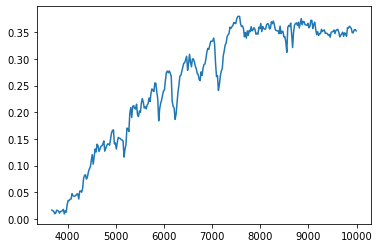

In [7]:
plt.plot(wavelength , combined_spectra.sum())

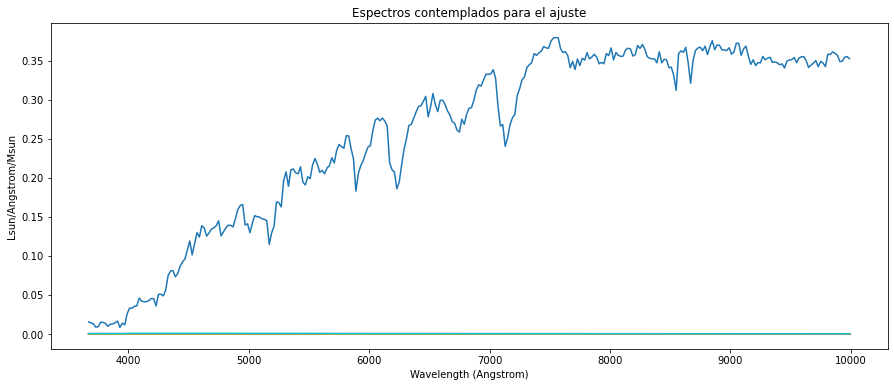

In [9]:
fig , axs = plt.subplots(ncols = 1, figsize = (15,6))
for i in np.arange(len(np.nonzero(min_weights)[0])):
    plt.plot(wavelength , nonzero_min_spectra.loc[i] * nonzero_min_weights.loc[i][0])
plt.title('Espectros contemplados para el ajuste')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Lsun/Angstrom/Msun')
plt.savefig('espectroscontemplados.png')


In [11]:
average_met , std_met = weighted_avg_and_std(min_parameters['MET'], min_weights)
average_alpham , std_alpham = weighted_avg_and_std(min_parameters['ALPHAM'], min_weights)

average_teff , std_teff = weighted_avg_and_std(min_parameters['TEFF'], min_weights)
average_logg , std_logg = weighted_avg_and_std(min_parameters['LOGG'], min_weights)


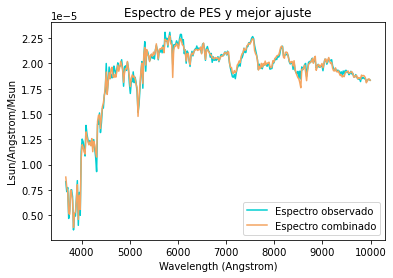

In [13]:
plt.plot(wavelength , obs_spectra , c = 'darkturquoise' , label = 'Espectro observado')
plt.plot(wavelength , (fm(ran_spectra[2] , ran_weights[2])) , c = 'sandybrown' ,label = 'Espectro combinado')

plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Lsun/Angstrom/Msun')
plt.title('Espectro de PES y mejor ajuste')
plt.legend()
plt.savefig('PESespectro.png')

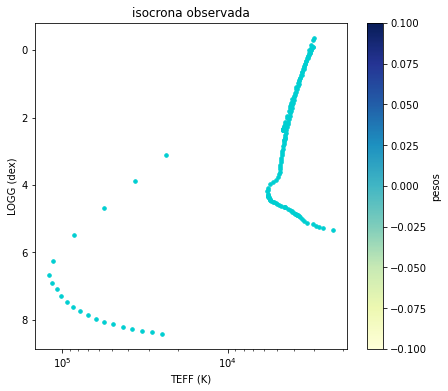

In [15]:
fig , axs = plt.subplots(ncols = 1, figsize = (7,6))
map_parameters(1 , parameter1 , parameter2 , nonzero_parameters , obs_params ,np.zeros_like(nonzero_weights))

axs.invert_xaxis()
axs.invert_yaxis()
axs.set_xlabel(parameter1+' (K)')
axs.set_ylabel(parameter2+' (dex)')
axs.semilogx()
plt.title('isocrona observada')
fig.savefig('isocrona.png')

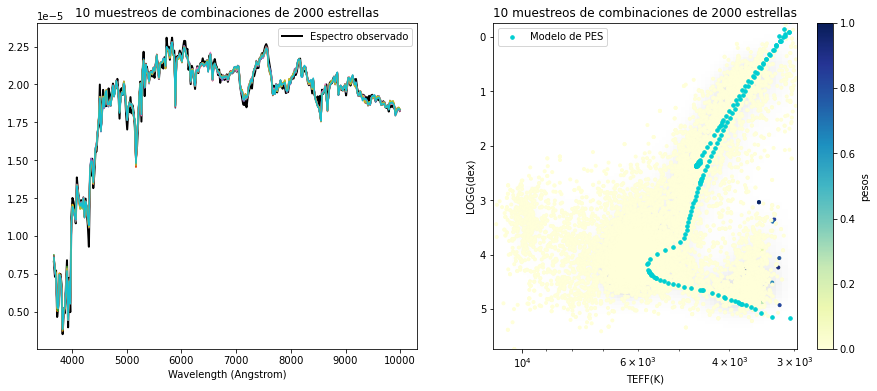

In [18]:
fig , axs = plt.subplots(ncols = 2, figsize = (15,6))
#plot_spectra(10 , ran_spectra , ran_weights) 
#map_parameters(10 , 'TEFF' , 'LOGG' , ran_parameters , params.loc[1000])
    #plotear el mejor ajuste 10 modelos de 100
plt.subplot(1,2,1,)

plot_spectra(m ,wavelength, ran_spectra , ran_weights  , obs_spectra, plot_err = False)
axs[0].set_xlabel('Wavelength (Angstrom)')
axs[0].set_title(str(m)+' muestreos de combinaciones de '+str(N)+' estrellas')
axs[0].legend()
plt.subplot(1,2,2)
plot_kde(parameter1 , parameter2 , mastar_params)
map_parameters(m , parameter1 , parameter2 , ran_parameters , obs_params , ran_weights)
axs[1].set_xlim(np.min(teff),np.max(teff))  #limite del plot en x
axs[1].set_ylim(np.min(logg),np.max(logg))
axs[1].invert_xaxis()
axs[1].invert_yaxis()
axs[1].semilogx()
axs[1].legend()
axs[1].set_xlabel(parameter1+'(K)')
axs[1].set_ylabel(parameter2+'(dex)')
axs[1].set_title(str(m)+' muestreos de combinaciones de '+str(N)+' estrellas')
fig.savefig(str(m)+'x'+str(N)+'_spectra_parameters_'+parameter1+'_'+parameter2+'.png') 
#5 muestreos de combinaciones de 1000 estrellas


#agarrar ssp pobre en metales
#promedio ponderado de np.sum()

#al punto de promedio agragar nube de error, con desviacion pesada de los weights
#desviacion estandar, es la distancia tipica al valor central (al promedio), 
#plt.errorbar(x ,y)

#ordenar la ltabla de parametros fisicos en fucnion de los pesos,con np.argsort, me da los indices de los weights y los uso
#para ordenar weights, x e y

#pq se separa tanto MET ALPHAM, no hay muestro uniforme de parametro de datos, combinan biliotecas estelares de distintas
#abundancias de hierro, pero en alpha no hacen 
#modelos combinan biliotexas para compensar rangos, pq las bilibotecas estelares no estan en completitud

Text(0.5, 1.0, 'Mapa de parámetros')

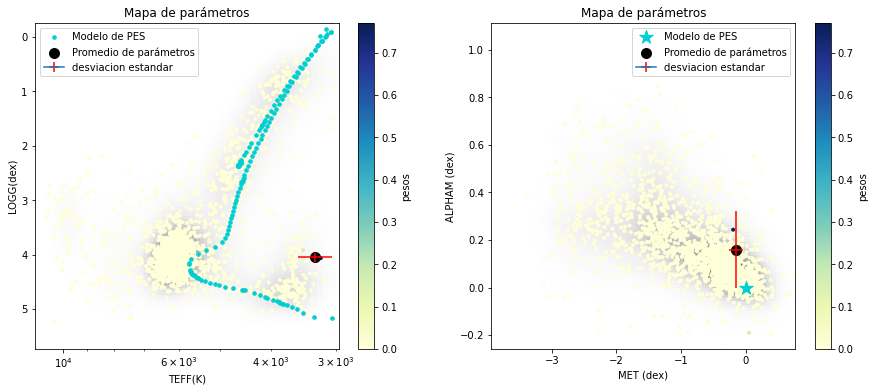

In [20]:
fig , axs = plt.subplots(ncols = 2, figsize = (15,6))
plt.subplot(1,2,1,)
plot_kde(parameter1 , parameter2 , mastar_params)
map_parameters(1 , parameter1 , parameter2 , min_parameters , obs_params ,min_weights)
plot_mean_parameters(m , parameter1 , parameter2 , min_parameters , min_weights)
axs[0].errorbar(average_teff, average_logg , std_logg , std_teff , ecolor = 'r' , label = 'desviacion estandar')


axs[0].set_xlim(np.min(teff),np.max(teff))  
axs[0].set_ylim(np.min(logg),np.max(logg))  
axs[0].invert_xaxis()
axs[0].invert_yaxis()
axs[0].semilogx()
axs[0].legend()
axs[0].set_xlabel(parameter1+'(K)')
axs[0].set_ylabel(parameter2+'(dex)')


axs[0].set_title('Mapa de parámetros')
plt.subplot(1,2,2,)
plot_kde('MET' , 'ALPHAM' , mastar_params)
map_parameters(1 , 'MET' , 'ALPHAM' , min_parameters , fake_params ,min_weights)
plot_mean_parameters(m , 'MET' , 'ALPHAM' , min_parameters , min_weights)
axs[1].errorbar(average_met, average_alpham , std_alpham , std_met , ecolor = 'r' , label = 'desviacion estandar')
axs[1].set_xlim(np.min(met),np.max(met))
axs[1].set_ylim(np.min(alpham),np.max(alpham))
#axs.invert_xaxis()
#axs.invert_yaxis()
axs[1].legend()
axs[1].set_xlabel('MET (dex)')
axs[1].set_ylabel('ALPHAM (dex)')
axs[1].set_title('Mapa de parámetros')

#fig.savefig('bestfitting_parameters_'+parameter1+'_'+parameter2+'.png')

In [17]:
#no sabemos alpham, solo met, y que este cerca de met es algo bueno
#estrellas brillantes que son suficientes para ajustar el espectro
#sesgado por las mas brillantes, a las menos brillantes no les esta dando nada de peso

#grafico de mejores espectros (los no 0) desde del min_spectra
#los que mas aportan, comninacion de N estrellas de MaStar que tienen mas peso en brillo y que mejor ajustan a las 
#estrellas de la isocrona (del PES)
#son las 2k estrellas que mejor ajustan a la secuencia de estrellas de la isocrona es su distribucion de brillo
#met/alpham: tiene mas pesos la capacidad de distinguir. nos enfocamos en meta. solares, porque estan mejor representadas en
#modelos de PES y mastar.
#las abundancias solares son las que mejor podemos determinar, pq estan mejor representadas en mastar y ssps
#mejor representado es que haya un mayor numero de esas estrellas, en la kde se puede ver

#mastar temperarutas menores de 12K (edad menor a decenas de Millones de años va a estar dificil) y metalicidades 
#similares a la solar

#recomendaciones: extender la biblioteca de mastar con bibliotecas teoricas con estrellas mas calientes (meyor a 12000K)
#y de menor metalicidad

#con respecto a los modelos de PES, usar modelos que tengan mejor resolucion espectral para capturar mejor los rasgos
#espectrales más sensibles a la metalicidad, que ayudaria q que se ajuste en mayor detalle usando mastar

#sesgos pueden venir de los metodos, de las bibliotecas (sesgadas a metalicidades solares)

Text(0.5, 1.0, 'best fitting parameters')

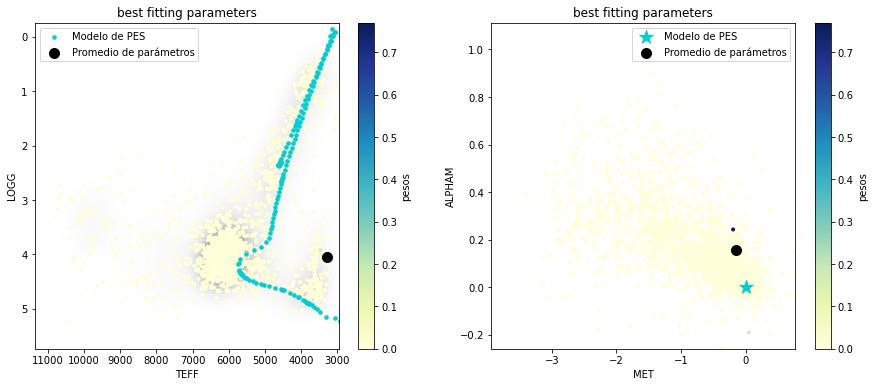

In [29]:
fig , axs = plt.subplots(ncols = 2, figsize = (15,6))
plt.subplot(1,2,1,)

plot_kde(parameter1 , parameter2 , mastar_params)
map_parameters(1 , parameter1 , parameter2 , min_parameters , obs_params ,min_weights)
plot_mean_parameters(m , parameter1 , parameter2 , min_parameters , min_weights)
axs[0].set_xlim(np.min(teff),np.max(teff))
axs[0].set_ylim(np.min(logg),np.max(logg))
axs[0].invert_xaxis()
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_xlabel(parameter1)
axs[0].set_ylabel(parameter2)
axs[0].set_title('best fitting parameters')



plt.subplot(1,2,2,)

plot_kde(parameter1 , parameter2 , mastar_params)
map_parameters(1 , 'MET' , 'ALPHAM' , min_parameters , fake_params ,min_weights)
plot_mean_parameters(m , 'MET' , 'ALPHAM' , min_parameters , min_weights)
axs[1].set_xlim(np.min(met),np.max(met))
axs[1].set_ylim(np.min(alpham),np.max(alpham))
#axs.invert_xaxis()
#axs.invert_yaxis()
axs[1].legend()
axs[1].set_xlabel('MET')
axs[1].set_ylabel('ALPHAM')
axs[1].set_title('best fitting parameters')